In [1]:
'''
Here we will be importing our cleaned dataset and start building an ML model to predict the customer churn
First set path
'''
path = r'C:\Users\Sandipto\OneDrive\Udemy ML\Projects\Churn model'
#### Importing Libraries ####

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt
import os
os.chdir(path)
dataset = pd.read_csv('new_churn_data.csv')

In [2]:
'''
We are separating the user_ID field as this will not be input into the ML model.
The field is stored for later use
'''
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [3]:
# One-Hot Encoding: This will introduce new columns for all the categorical columns. Very smart!!
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'android_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [4]:
#prevent dummy variable trap
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [6]:
# Balancing the Training Set
'''
suppose the training set which was prepared is having data with around 60% churn = 0
In our case we have data as such.
Churn 1 was around 12K+ and churn 0 was around 8K+. This can create a bias
Our model will be performing great even though the accuracy is 60%
But there is some bias towards churn = 0. So our DS is pretty spread out.
But in some case this doesn't happen after train test split.
Thus it is needed to perform Training set balancing
'''
print('Before balancing churn column distribution:\n' + str(y_train.value_counts()))

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

'''
Here we are balancing the positive and negative churns in the training set at random
'''

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index


'''
Length of churn 0 is more than length of churn 1.
Thus we are chopping churn 0 to the length of churn 1
'''
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

'''
Now churn 1 count = churn 0 count = 8940 nice!!!
Run the code below
'''
print('After balancing churn column distribution:\n' + str(y_train.value_counts()))

Before balancing churn column distribution:
0    12656
1     8940
Name: churn, dtype: int64
After balancing churn column distribution:
1    8940
0    8940
Name: churn, dtype: int64


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [29]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

# Predicting Test Set
y_pred = LR.predict(X_test)


'''
accuracy_score: Overall how many times our model predicted accurate = (tp+tn)/no. of obs
precision_score: When it predicts yes, how often is it correct?
'''
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n' + str(cm))
print('accuracy_score: %.2f' %(accuracy_score(y_test, y_pred)))
print('precision_score: %.2f' %(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('recall_score: %.2f' %(recall_score(y_test, y_pred))) # tp / (tp + fn)
print('f1_score: %.2f' %(f1_score(y_test, y_pred)))

Confusion matrix:
[[1687 1479]
 [ 590 1644]]
accuracy_score: 0.62
precision_score: 0.53
recall_score: 0.74
f1_score: 0.61


In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
from sklearn.svm import SVC
svc_kernel = SVC(kernel = 'rbf', random_state = 0)
svc_kernel.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [32]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [8]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
#perform k fold cross validation
classifier = RF
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Bias variance tradeoff:")
print("Accuracy average = " + str(accuracies.mean()))
print("Accuracy std = " + str(accuracies.std()))

Bias variance tradeoff:
Accuracy average = 0.785234899328859
Accuracy std = 0.008675216003128075


In [9]:
#Performance evaluation of Random Forest on test set
y_pred = RF.predict(X_test)


'''
accuracy_score: Overall how many times our model predicted accurate = (tp+tn)/no. of obs
precision_score: When it predicts yes, how often is it correct?
'''
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n' + str(cm))
print('accuracy_score: %.2f'%(accuracy_score(y_test, y_pred)))
print('precision_score: %.2f'%(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('recall_score: %.2f'%(recall_score(y_test, y_pred))) # tp / (tp + fn)
print('f1_score: %.2f'%(f1_score(y_test, y_pred)))

Confusion matrix:
[[1990 1176]
 [ 548 1686]]
accuracy_score: 0.68
precision_score: 0.59
recall_score: 0.75
f1_score: 0.66


In [ ]:
#optimizing the Randomforest classifier using Gridsearch
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[100,150,200,250],
               'criterion':['gini','entropy'],
              }]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = ['f1','accuracy'],
                           cv = 10,
                           refit='f1',
                           n_jobs = 1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [54]:
print('best f1 and accuracy ' + str(best_accuracy))
print('best parameters ' + str(best_parameters))

best f1 and accuracy 0.7780440316929642
best parameters {'criterion': 'entropy', 'n_estimators': 250}


In [10]:
## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Model to Test
classifier = RF
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print("RFE.support: " + str(rfe.support_))
print("RFE.ranking: " + str(rfe.ranking_))
X_train.columns[rfe.support_]

RFE.support: [ True  True  True  True  True False  True False False  True False  True
  True  True False False False False  True False  True  True False  True
  True False False  True False False False False  True  True False  True
 False False False  True]
RFE.ranking: [ 1  1  1  1  1 12  1 17 20  1 18  1  1  1 21 15 14 19  1 16  1  1 11  1
  1  8  9  1  6 10  2 13  1  1  4  1  5  7  3  1]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'web_user', 'android_user',
       'registered_phones', 'left_for_two_month_plus', 'reward_rate',
       'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Weekly', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Pisces', 'zodiac_sign_Virgo'],
      dtype='object')

In [13]:
df2 = X_train[X_train.columns[rfe.support_]]
df2.columns

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'web_user', 'android_user',
       'registered_phones', 'left_for_two_month_plus', 'reward_rate',
       'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Weekly', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Pisces', 'zodiac_sign_Virgo'],
      dtype='object')

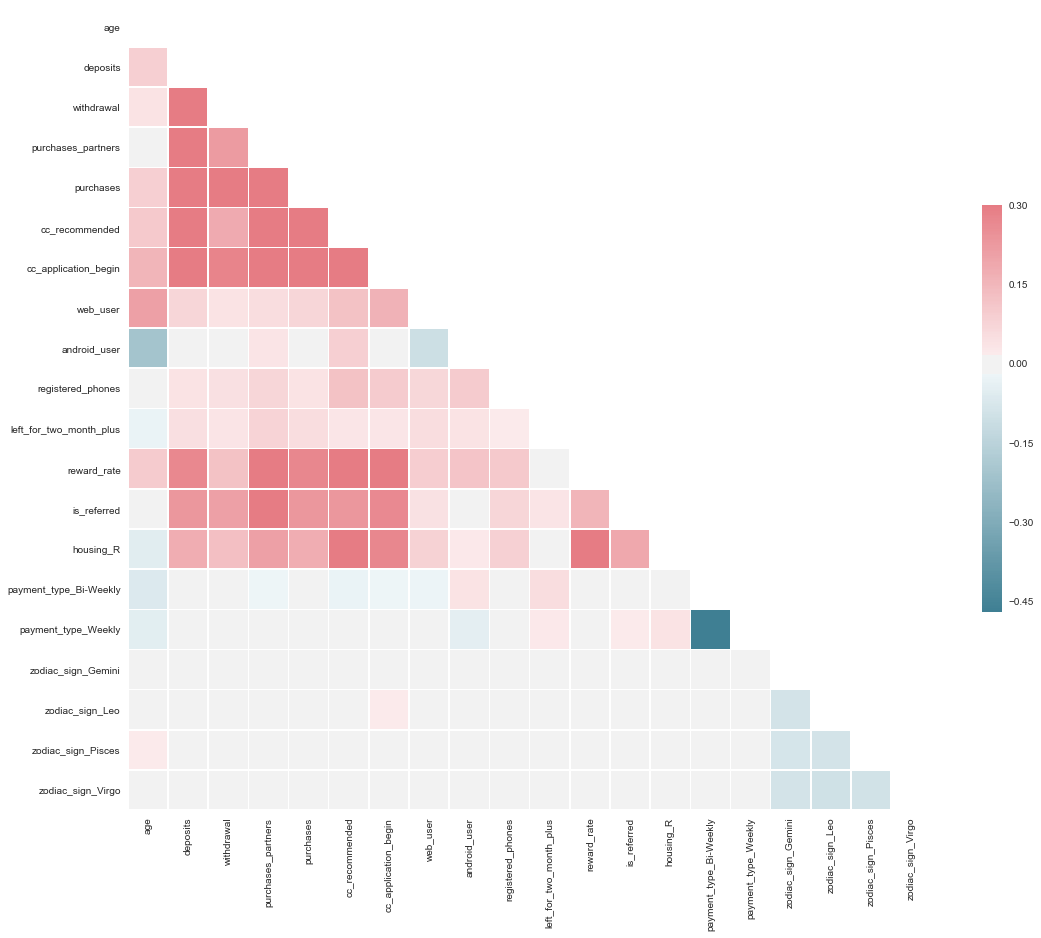

In [14]:
# New Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    


In [15]:
# Fitting Model to the Training Set
X_train = df2
from sklearn.ensemble import RandomForestClassifier
RF2 = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 0)
RF2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
# Predicting Test Set
y_pred = RF2.predict(X_test[df2.columns])

In [21]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n' + str(cm))
print('accuracy_score: %.2f'%(accuracy_score(y_test, y_pred)))
print('precision_score: %.2f'%(precision_score(y_test, y_pred))) # tp / (tp + fp)
print('recall_score: %.2f'%(recall_score(y_test, y_pred))) # tp / (tp + fn)
print('f1_score: %.2f'%(f1_score(y_test, y_pred)))

Confusion matrix:
[[2025 1141]
 [ 575 1659]]
accuracy_score: 0.68
precision_score: 0.59
recall_score: 0.74
f1_score: 0.66


In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = RF2,
                             X = X_train,
                             y = y_train, cv = 10)

In [23]:
print("RF Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

RF Accuracy: 0.773 (+/- 0.011)
